# Data Handeling: Groupby, Merge, Split

-------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

### Load data

---------

In [2]:
titanic = pd.read_csv('data/titanic.csv')

### Setting Name column as index

In [3]:
titanic_df1 = titanic.copy(deep =True)

In [4]:
titanic_df1 = titanic.set_index('Name')
titanic_df1.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


-----------

## Group By : ```groupby.aggregate()```, ```groupby.size()```,```groupby.mean()```,

-----------

### The groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="plots/splitApplyCombine.png">


In [6]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [7]:
df.groupby('key').aggregate(np.sum)

,data
key,
A,15
B,30
C,45


### Exercise with Titanic Dataset

In [8]:
titanic_df1.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), calculate the average age for each sex.
</div>

In [9]:
titanic_df1.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

----------

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the average survival ratio for all passengers.
</div>

In [10]:
titanic_df1['Survived'].sum() / len(titanic_df1['Survived'])

0.3838383838383838

-------------

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).
</div>

In [23]:
df25 = titanic_df1[titanic_df1['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4119601328903654

-----------

<div class="alert alert-success">
    <b>EXERCISE</b>: Is there a difference in this survival ratio between the sexes? (tip: write the above calculation of the survival ratio as a function)
</div>

In [25]:
def survival_ratio(survived):
    return survived.sum() / len(survived)

In [26]:
titanic_df1.groupby('Sex')['Survived'].aggregate(survival_ratio)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

-----------

<div class="alert alert-success">
    <b>EXERCISE</b>: Make a bar plot of the survival ratio for the different classes ('Pclass' column).
</div>

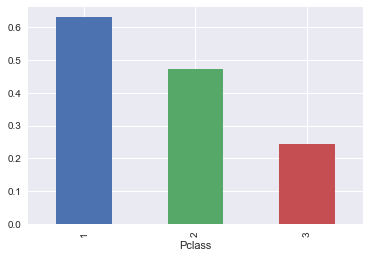

In [29]:
titanic_df1.groupby('Pclass')['Survived'].aggregate(survival_ratio).plot(kind='bar')

## Advanced Groupby Operations

<div class="alert alert-success">
    <b>EXERCISE</b>: Find data for age distribution.
</div>

In [6]:
11//2

5

In [12]:
type(10//2)

int

In [33]:
df = titanic_df1.copy(deep =True)

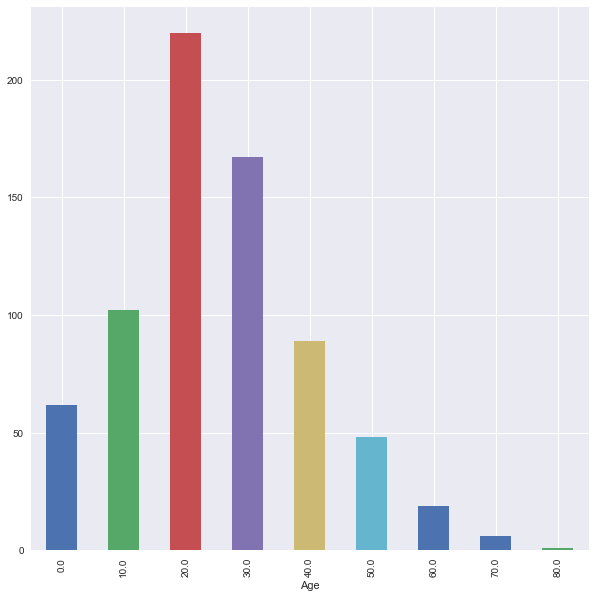

In [37]:
df.groupby(df.Age//10 * 10).size().plot(kind='bar',figsize = [10,10])

<div class="alert alert-success">
    <b>EXERCISE</b>: Find data for male age distribution.
</div>

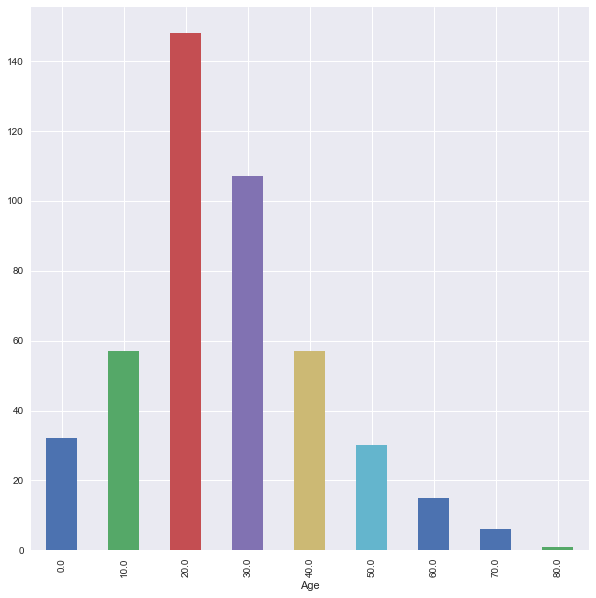

In [39]:
Male = df[df['Sex'] == 'male']
Male.groupby(Male.Age // 10 * 10).size().plot(kind='bar',figsize = [10,10])

<div class="alert alert-success">
    <b>EXERCISE</b>: List data with Fare size greater then 50.
</div>

In [43]:
Fare50 = df[df.Fare>50]
Fare50.groupby([ 'Sex']).size()

Sex
female    87
male      73
dtype: int64

In [44]:
Fare50.groupby(['Age', 'Sex','Survived']).size()

Age    Sex     Survived
0.92   male    1           1
2.00   female  0           1
4.00   male    1           1
11.00  male    1           1
14.00  female  1           1
15.00  female  1           1
16.00  female  1           2
17.00  female  1           2
       male    1           1
18.00  female  1           3
       male    0           2
19.00  female  1           1
       male    0           2
21.00  female  1           2
       male    0           3
22.00  female  1           3
       male    0           1
23.00  female  1           2
       male    1           1
24.00  female  1           5
       male    0           3
25.00  female  0           1
       male    1           2
26.00  female  1           1
       male    1           1
27.00  male    0           1
               1           2
28.00  male    0           2
29.00  female  1           1
       male    0           1
                          ..
45.00  female  1           1
       male    0           1
46.00  male    0   

------------

## Group by followed by Transformation: ```groupby.transform()```

In [46]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


In [47]:
df.groupby('key').transform('mean')

,data
0,5
1,10
2,15
3,5
4,10
5,15
6,5
7,10
8,15


In [48]:
def normalize(group):
    return (group - group.mean()) / group.std()

In [49]:
df.groupby('key').transform(normalize)

,data
0,-1.0
1,-1.0
2,-1.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0


In [50]:
df.groupby('key').transform('sum')

,data
0,15
1,30
2,45
3,15
4,30
5,45
6,15
7,30
8,45
